## Table of Contents
### Importing Libraries and Data
### Data Security Check
### Spending Habits by Region
#### &emsp; Creating the 'region' column
#### &emsp; Comparing 'region' and 'spending_flag'
### Excluding Low-Activity Customers
#### &emsp; Creating the 'exculsion_flag' column
#### &emsp; Creating the sample
#### Exporting the sample
### Profiling Customers
#### &emsp; Age
#### &emsp; Income
#### &emsp; Department
#### &emsp; Family Status
### Profile Visualizations
### Profile Aggregation
### Customer Profiles by Region and Department
### Visualizations for Results
### Exporting as orders_products_final.pkl

### Step 1 Importing

In [6]:
# Importing libraries and data set

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [7]:
path = r'C:\Users\jmowe\OneDrive\5-9-2023 Instacart Basket Analysis'

In [8]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_combined.pkl'))

In [4]:
df.loc[df['prices'] >100, 'prices'] = np.nan

In [5]:
df.shape

(32404859, 32)

In [6]:
columns = df.columns
print(columns)

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'avg_price',
       'spending_flag', 'median_freq', 'order_freq_flag', 'First Name',
       'Last Name', 'Gender', 'STATE', 'Age', 'date_joined',
       'Number of Dependants', 'Marital Status', 'income', 'region',
       'low_activity_flag', 'age_profile', 'income_profile', 'vegan_profile',
       'variety_profile', 'family_profile'],
      dtype='object')


### Step 2 Addressing PII concerns

In [6]:
# It is stated in this exercise that all names and prices are fabricated for this dataset and project. No PII concerns are likely since all given names are fake.
# If they were not fake, we could delete the first and last name columns when moving forward after confirming it with a supervisor.

### Step 3 Comparing customer behavior in different geographic areas

In [18]:
# Creating a 'Region' column by seperating 'state' value into region buckets

northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
south = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
west = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [19]:
# Use the loc function to follow through

df.loc[df['STATE'].isin(northeast), 'region'] = 'Northeast'
df.loc[df['STATE'].isin(midwest), 'region'] = 'Midwest'
df.loc[df['STATE'].isin(south), 'region'] = 'South'
df.loc[df['STATE'].isin(west), 'region'] = 'West'

In [20]:
df['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [31]:
# Creating a cross table for regions and spending variables

crosstab_region_spending = pd.crosstab(df['region'], df['spending_flag'], dropna = False)

In [32]:
crosstab_region_spending

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


In [12]:
# The most significant difference in regions is the number of spenders in the South. If instacart wanted to make a targetd campaign, this data points towards the South
# and west regions as being most opportune.

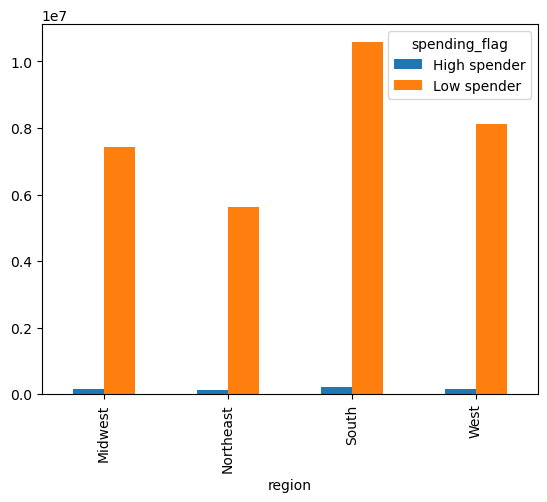

In [36]:
#Graphing the crosstab region
crosstab_region_spending.plot(kind='bar')
plt.show()

In [28]:
#Exporting the crosstab region

crosstab_region_spending_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_spending.png'))


NameError: name 'crosstab_region_spending_bar' is not defined

### Step 4 Excluding low-activity customers

In [13]:
# Creating an exclusion flag based on customers with less than 5 orders

df.loc[df['max_order'] < 5, 'low_activity_flag'] = 'Low-activity customer'

In [14]:
df.loc[df['max_order'] >= 5, 'low_activity_flag'] = 'High-activity customer'

In [15]:
df['low_activity_flag'].value_counts(dropna = False)

High-activity customer    30964564
Low-activity customer      1440295
Name: low_activity_flag, dtype: int64

In [16]:
# Creating a dataset with high-activity customers only and exporting it

df_high_activity = df[df['low_activity_flag'] == 'High-activity customer']

In [17]:
df_high_activity.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Last Name,Gender,STATE,Age,date_joined,Number of Dependants,Marital Status,income,region,low_activity_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer


In [18]:
df_high_activity.to_pickle(os.path.join(path,'02 Data','Prepared Data','high_activity_only.pkl'))

### Step 5 Profiling Customers

##### This step involves making profiles and flags for multiple variables in order to satisfy the project brief queries.

In [19]:
# Age

age_flag = []
for x in df['Age'].tolist():
    if x <= 25:
        age_flag.append('Young')
    elif x > 25 and x < 65:
        age_flag.append('Middle-aged')
    elif x >= 65:
        age_flag.append('Senior')
    else:
        print('Weird value:', x)

In [20]:
df['age_profile'] = age_flag

In [21]:
# Checking frequency

df['age_profile'].value_counts(dropna = False)

Middle-aged    19784586
Senior          8575084
Young           4045189
Name: age_profile, dtype: int64

In [22]:
# Income

income_flag = []
for x in df['income'].tolist():
    if x < 60000:
        income_flag.append('Low-income')
    elif x >= 60000 and x < 125000:
        income_flag.append('Mid-income')
    elif x >= 125000:
        income_flag.append('High-income')
    else:
        print('Weird value:', row)

In [23]:
df['income_profile'] = income_flag

In [24]:
# Checking freq

df['income_profile'].value_counts(dropna = False)

Mid-income     17613761
High-income     8630957
Low-income      6160141
Name: income_profile, dtype: int64

##### Seperating department values into vegan and non-vegans as well as grocery purchases vs miscellanous purchases

In [25]:
# Creating a crosstab between 'department_id' and 'user_id' to label customers appropriately based off their department purches

dep_user_cross = pd.crosstab(df['department_id'], df['user_id'], dropna = False)

In [26]:
dep_user_cross.head()

user_id,1,10,100,1000,10000,100000,100001,100002,100003,100004,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
department_id,,,,,,,,,,,,,,,,,,,,,
1,0,1,3,5,56,0,16,7,3,0,...,13,16,4,9,12,7,51,4,2,9
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,0,0,2,1,56,8,17,1,2,0,...,1,0,2,4,7,2,4,3,0,7
4,5,72,10,34,340,51,393,0,10,0,...,196,78,4,22,68,10,20,10,14,129
5,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,4,0,0,0,0


In [27]:
# Assigning nutrition flags to users and storing them in a Python dictionary, excluding customers from that have history with meat and diary purchases (department 12 or 16).

vegan_dict = dict()
for user in dep_user_cross:
    workinglist = dep_user_cross[user].tolist()
    if workinglist[11] == 0 and workinglist[15] == 0:   # the index starts at 0, so index 0 corresponds to dep_id=1
        vegan_dict[user] = 'Vegan'
    else:
        vegan_dict[user] = 'Non-vegan'

In [28]:
# Assigning user flags to the vegan_flag

vegan_flag = []
for user in df['user_id']:
    vegan_flag.append(vegan_dict[user])

In [29]:
# Adding vegan_flag to df as 'vegan_profile'

df['vegan_profile'] = vegan_flag

In [30]:
# Checking freq 'vegan_profile'

df['vegan_profile'].value_counts(dropna = False)

Non-vegan    32021432
Vegan          383427
Name: vegan_profile, dtype: int64

In [31]:
# Repeating the process to single out customers that are only interested in groceries and food products

misc_dict = dict()
for user in dep_user_cross:
    workinglist = dep_user_cross[user].tolist()
    if workinglist[20] == 0 and workinglist[17] == 0 and workinglist[16] == 0 and workinglist[10] == 0 and workinglist[7] == 0 and workinglist[5] == 0 and workinglist[1] == 0:   # the index starts at 0, so index 0 corresponds to dep_id=1
        misc_dict[user] = 'Groceries Only'
    else: 
        misc_dict[user] = 'Variety Purchases'

In [32]:
variety_flag = []
for user in df['user_id']:
    variety_flag.append(misc_dict[user])

In [33]:
df['variety_profile'] = variety_flag

In [34]:
df['variety_profile'].value_counts(dropna = False)

Variety Purchases    30085901
Groceries Only        2318958
Name: variety_profile, dtype: int64

#### Moving on to family status

In [5]:
# Creating buckets for dependent x married variables

df.loc[(df['Marital Status'] == 'married') & (df['Number of Dependants'] == 1), 'family_profile'] = 'Married no children'

In [6]:
# Creating the 'family_profile' column and labeling the 'married with children' customers

df.loc[(df['Marital Status'] == 'married') & (df['Number of Dependants'] >= 2), 'family_profile'] = 'Married with children'

In [7]:
# Creating the 'family_profile' column and labeling the 'single no children' customers

df.loc[(df['Marital Status'] != 'married') & (df['Number of Dependants'] == 0), 'family_profile'] = 'Single no children'

In [8]:
# Creating the 'family_profile' column and labeling the 'single with children' customers

df.loc[(df['Marital Status'] != 'married') & (df['Number of Dependants'] >= 1), 'family_profile'] = 'Single with children'

In [39]:
# Getting frequency distribution for 'family_profile'

df['family_profile'].value_counts(dropna = False)

Married with children    15205849
Single no children        8097503
Married no children       7550904
Single with children      1550603
Name: family_profile, dtype: int64

### Step 6 Visualization(s)

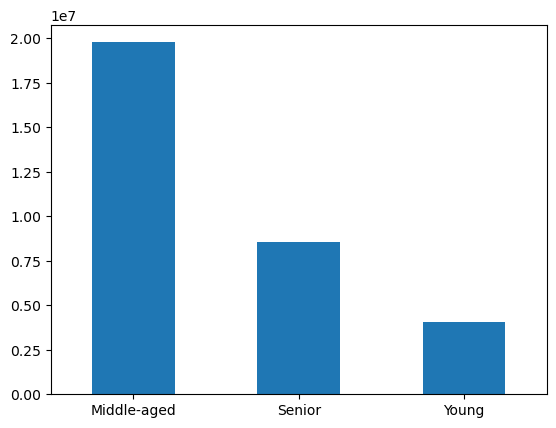

In [40]:
age_profile_bar = df['age_profile'].value_counts().plot.bar(rot=0)

In [41]:
age_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_profile_bar.png'))

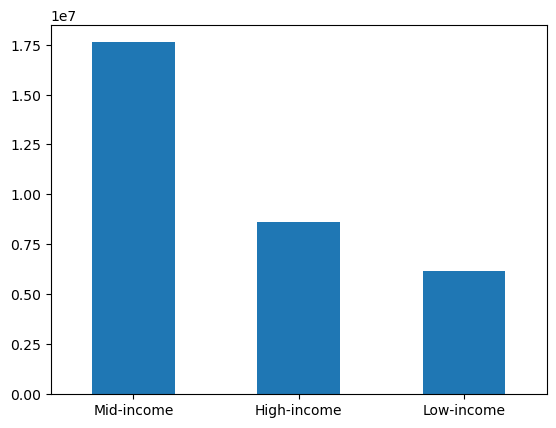

In [42]:
income_profile_bar = df['income_profile'].value_counts().plot.bar(rot=0)

In [43]:
income_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_profile_bar.png'))

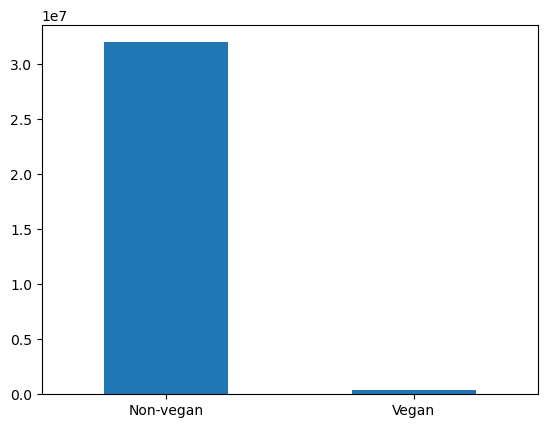

In [44]:
vegan_profile_bar = df['vegan_profile'].value_counts().plot.bar(rot=0)

In [45]:
vegan_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'vegan_profile_bar.png'))

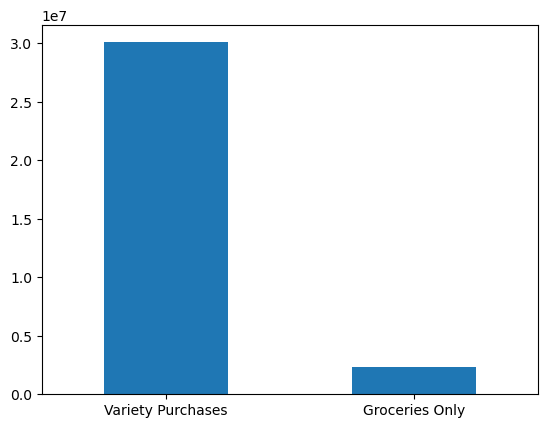

In [46]:
variety_profile_bar = df['variety_profile'].value_counts().plot.bar(rot=0)

In [47]:
variety_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'variety_profile_bar.png'))

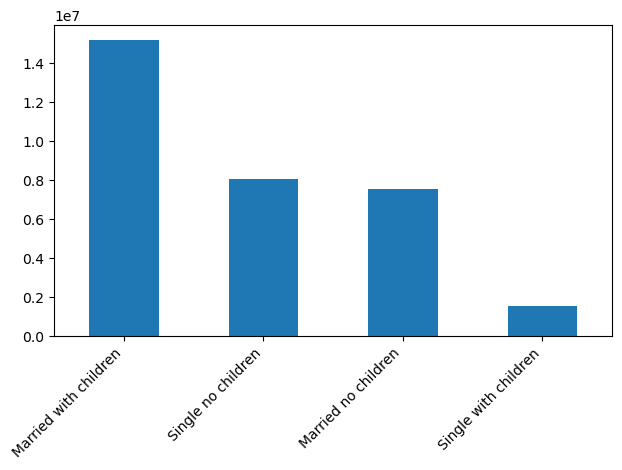

In [14]:
family_profile_bar = df['family_profile'].value_counts().plot.bar()

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

In [15]:
family_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_profile_bar.png'))

#### Step 7 Exploring max, mean min, of all customer-profiles based on prices

In [50]:
#age

df.groupby('age_profile').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order               prices           
                              mean   max  min      mean   max  min
age_profile                                                       
Middle-aged              11.117362  30.0  0.0  7.789660  25.0  1.0
Senior                   11.078641  30.0  0.0  7.796546  25.0  1.0
Young                    11.093030  30.0  0.0  7.785748  25.0  1.0

In [51]:
#income

df.groupby('income_profile').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order               prices           
                                 mean   max  min      mean   max  min
income_profile                                                       
High-income                 11.024072  30.0  0.0  7.957172  25.0  1.0
Low-income                  11.427331  30.0  0.0  7.072255  25.0  1.0
Mid-income                  11.031076  30.0  0.0  7.960981  25.0  1.0

In [52]:
#vegan

df.groupby('vegan_profile').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order               prices           
                                mean   max  min      mean   max  min
vegan_profile                                                       
Non-vegan                  11.063329  30.0  0.0  7.800348  25.0  1.0
Vegan                      14.749275  30.0  0.0  7.009920  20.0  1.0

In [54]:
#variety

df.groupby('variety_profile').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order               prices           
                                    mean   max  min      mean   max  min
variety_profile                                                         
Groceries Only                 14.811738  30.0  0.0  7.680446  25.0  1.0
Variety Purchases              10.839053  30.0  0.0  7.799515  25.0  1.0

In [53]:
#family

df.groupby('family_profile').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order               prices           
                                        mean   max  min      mean   max  min
family_profile                                                              
Married no children                11.113141  30.0  0.0  7.795712  25.0  1.0
Married with children              11.117681  30.0  0.0  7.788203  25.0  1.0
Single no children                 11.080805  30.0  0.0  7.789975  25.0  1.0
Single with children               11.048170  30.0  0.0  7.800712  25.0  1.0

### Step 8 comparing created profiles with region and departments

In [55]:
# age and region

age_region_cross = pd.crosstab(df['age_profile'], df['region'], normalize = 'columns')
# normalize = 'columns' gives the column percentages

In [56]:
age_region_cross

region,Midwest,Northeast,South,West
age_profile,,,,
Middle-aged,0.614288,0.604208,0.609621,0.612686
Senior,0.262045,0.271531,0.262814,0.264573
Young,0.123666,0.124261,0.127565,0.122741


In [57]:
# age and department

age_department_cross = pd.crosstab(df['age_profile'], df['department_id'], normalize = 'index')   
# normalize = 'index' gives row percentages

In [58]:
pd.set_option('display.max_columns', None)    # displays all columns

age_department_cross

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
age_profile,,,,,,,,,,,,,,,,,,,,,
Middle-aged,0.068796,0.001122,0.036214,0.292547,0.004764,0.008312,0.082903,0.002938,0.026682,0.001057,0.013867,0.021732,0.057853,0.021718,0.032962,0.166679,0.022748,0.013210,0.089266,0.032507,0.002125
Senior,0.069232,0.001099,0.036096,0.293147,0.004552,0.008253,0.083362,0.003065,0.026698,0.001078,0.013691,0.022171,0.057956,0.021439,0.032937,0.166321,0.022966,0.012763,0.088689,0.032375,0.002110
Young,0.069212,0.001154,0.036198,0.291112,0.005046,0.008414,0.082342,0.003287,0.027146,0.001093,0.013798,0.021965,0.057796,0.022129,0.033000,0.166830,0.022662,0.013105,0.089228,0.032261,0.002225


In [60]:
#income and region

income_region_cross = pd.crosstab(df['income_profile'], df['region'], normalize = 'columns')
# normalize = 'columns' gives the column percentages

In [61]:
income_region_cross

region,Midwest,Northeast,South,West
income_profile,,,,
High-income,0.270318,0.268977,0.262824,0.265481
Low-income,0.187755,0.189074,0.193260,0.188842
Mid-income,0.541927,0.541950,0.543916,0.545677


In [62]:
#income and departments

income_department_cross = pd.crosstab(df['income_profile'], df['department_id'], normalize = 'index')
# normalize = 'index' gives row percentages

In [63]:
income_department_cross

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
income_profile,,,,,,,,,,,,,,,,,,,,,
High-income,0.070178,0.001124,0.037367,0.296090,0.005225,0.008508,0.079665,0.003198,0.027690,0.000964,0.013796,0.023733,0.059357,0.021042,0.034518,0.169215,0.022926,0.013578,0.077290,0.032395,0.002141
Low-income,0.066106,0.001140,0.033210,0.263449,0.005066,0.007197,0.101902,0.002678,0.022153,0.001234,0.014206,0.014175,0.052767,0.025316,0.027360,0.154938,0.024753,0.009729,0.138554,0.031981,0.002086
Mid-income,0.069367,0.001111,0.036638,0.300950,0.004394,0.008600,0.077940,0.003044,0.027885,0.001059,0.013682,0.023662,0.058932,0.020749,0.034155,0.169403,0.022046,0.014005,0.077607,0.032625,0.002147


In [64]:
#vegan and region

vegan_region_cross = pd.crosstab(df['vegan_profile'], df['region'], normalize = 'columns')
# normalize = 'columns' gives the column percentages

In [65]:
vegan_region_cross

region,Midwest,Northeast,South,West
vegan_profile,,,,
Non-vegan,0.988115,0.988159,0.988389,0.987934
Vegan,0.011885,0.011841,0.011611,0.012066


In [71]:
#vegan and department

vegan_department_cross = pd.crosstab(df['vegan_profile'], df['department_id'], normalize = 'index')
# normalize = 'index' gives row percentages

In [67]:
vegan_department_cross

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
vegan_profile,,,,,,,,,,,,,,,,,,,,,
Non-vegan,0.069073,0.001104,0.036399,0.292392,0.004387,0.008358,0.081628,0.003010,0.026952,0.001059,0.013644,0.022139,0.058016,0.021700,0.033148,0.168598,0.022303,0.013163,0.088189,0.032604,0.002135
Vegan,0.059795,0.002470,0.017964,0.303800,0.034432,0.004222,0.193680,0.003484,0.009386,0.001750,0.027872,0.000000,0.045936,0.021263,0.017244,0.000000,0.063884,0.006045,0.165925,0.018809,0.002037


In [68]:
#variety and region

variety_region_cross = pd.crosstab(df['variety_profile'], df['region'], normalize = 'columns')
# normalize = 'columns' gives the column percentages

In [69]:
variety_region_cross

region,Midwest,Northeast,South,West
variety_profile,,,,
Groceries Only,0.070774,0.07185,0.072245,0.071196
Variety Purchases,0.929226,0.92815,0.927755,0.928804


In [72]:
#variety and departments

variety_department_cross = pd.crosstab(df['variety_profile'], df['department_id'], normalize = 'index')
# normalize = 'index' gives row percentages

In [73]:
variety_department_cross

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
variety_profile,,,,,,,,,,,,,,,,,,,,,
Groceries Only,0.064735,0.000000,0.033414,0.359661,0.006720,0.000000,0.088910,0.000000,0.020601,0.001462,0.000000,0.021633,0.047905,0.021481,0.025718,0.174705,0.000000,0.000000,0.098702,0.034354,0.000000
Variety Purchases,0.069289,0.001206,0.036394,0.287352,0.004591,0.008949,0.082495,0.003248,0.027217,0.001036,0.014876,0.021896,0.058641,0.021712,0.033518,0.165979,0.024552,0.014086,0.088369,0.032294,0.002298


In [17]:
#family and region

family_region_cross = pd.crosstab(df['family_profile'], df['region'], normalize = 'columns')
# normalize = 'columns' gives the column percentages

In [77]:
family_region_cross

region,Midwest,Northeast,South,West
family_profile,,,,
Married no children,0.236932,0.236116,0.229883,0.231373
Married with children,0.464053,0.469197,0.470703,0.472141
Single no children,0.250772,0.247836,0.250342,0.249893
Single with children,0.048243,0.046851,0.049072,0.046593


In [74]:
#family and departments

family_department_cross = pd.crosstab(df['family_profile'], df['department_id'], normalize = 'index')
# normalize = 'index' gives row percentages

In [75]:
family_department_cross

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
family_profile,,,,,,,,,,,,,,,,,,,,,
Married no children,0.068501,0.001134,0.036290,0.292094,0.004674,0.008405,0.082844,0.002980,0.026714,0.001107,0.013833,0.022041,0.058145,0.021909,0.033025,0.167336,0.022995,0.012703,0.089014,0.032144,0.002111
Married with children,0.069171,0.001094,0.036029,0.292561,0.004629,0.008221,0.083094,0.002960,0.026828,0.001070,0.013798,0.021994,0.057826,0.021590,0.033057,0.166058,0.022954,0.013235,0.089272,0.032420,0.002140
Single no children,0.068806,0.001133,0.036358,0.293355,0.004831,0.008362,0.083290,0.003036,0.026584,0.001022,0.013832,0.021498,0.057642,0.021559,0.032706,0.166639,0.022325,0.013151,0.089015,0.032744,0.002110
Single with children,0.069994,0.001232,0.036207,0.289970,0.005737,0.008432,0.080375,0.003624,0.026894,0.001080,0.013744,0.021915,0.058217,0.022398,0.033013,0.168184,0.022718,0.012992,0.088458,0.032513,0.002303


### Step 9 Creating visualizations for previous comparisons

#### Profiles x regions

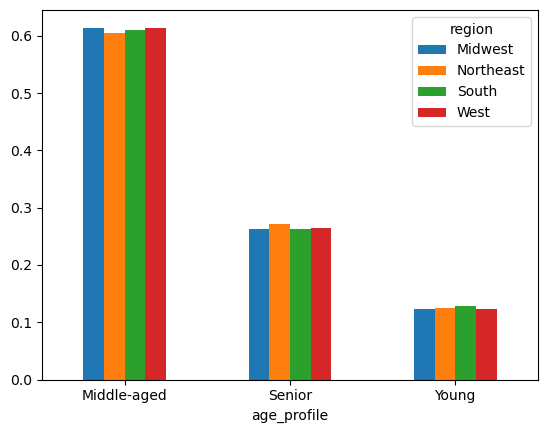

In [78]:
# age_profile by region

age_region_bar = age_region_cross.plot.bar(rot=0)

In [79]:
# Exporting 

age_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_region_bar.png'))

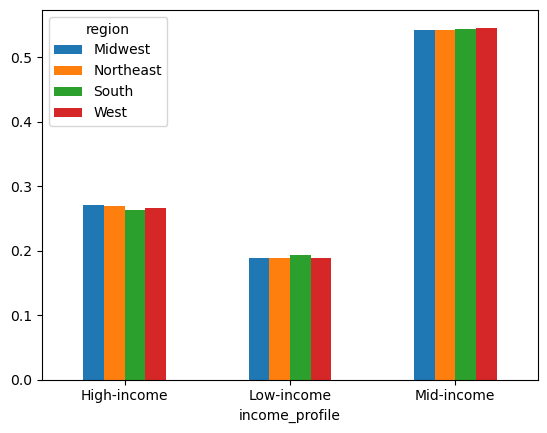

In [80]:
# income_profile by region

income_region_bar = income_region_cross.plot.bar(rot=0)

In [81]:
# Exporting 

income_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_region_bar.png'))

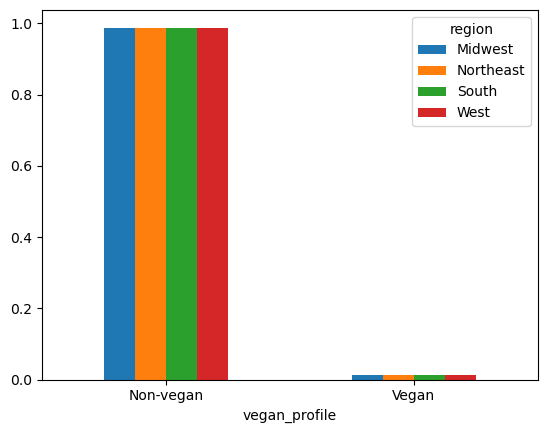

In [82]:
# vegan_profile by region

vegan_region_bar = vegan_region_cross.plot.bar(rot=0)

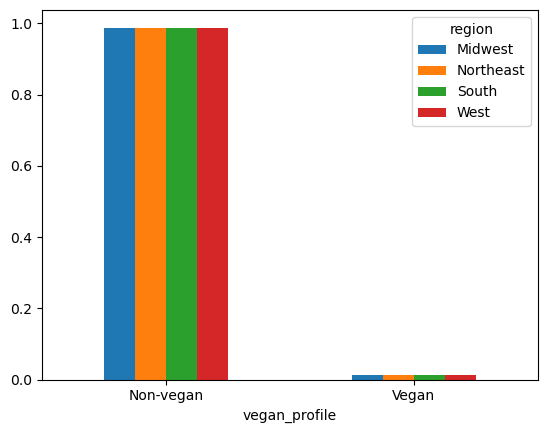

In [83]:
# vegan_profile by region

vegan_region_bar = vegan_region_cross.plot.bar(rot=0)

In [84]:
# Exporting

vegan_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'vegan_region_bar.png'))

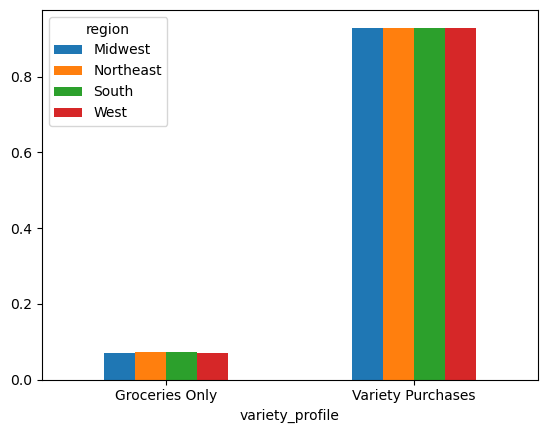

In [85]:
# variety_profile by region

variety_region_bar = variety_region_cross.plot.bar(rot=0)

In [86]:
# Exporting 

variety_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'variety_region_bar.png'))

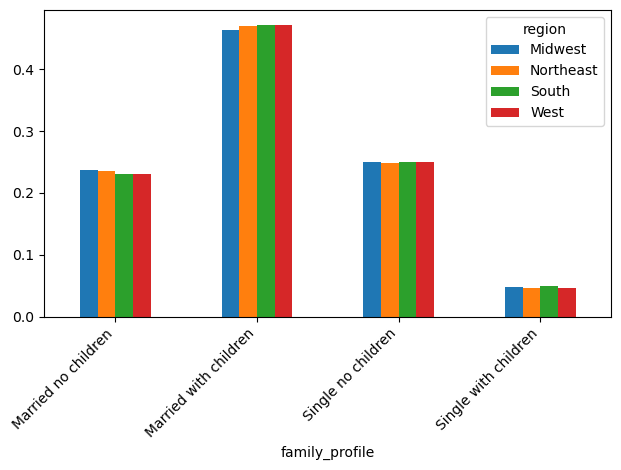

In [18]:
# family_profile by region

family_region_bar = family_region_cross.plot.bar()
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

In [19]:
# Exporting 

family_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_region_bar.png'))

##### Profiles x departments

In [89]:
# Creating a new crosstab so that the departments are on the x-axis

age_department_cros = pd.crosstab(df['department_id'], df['age_profile'])

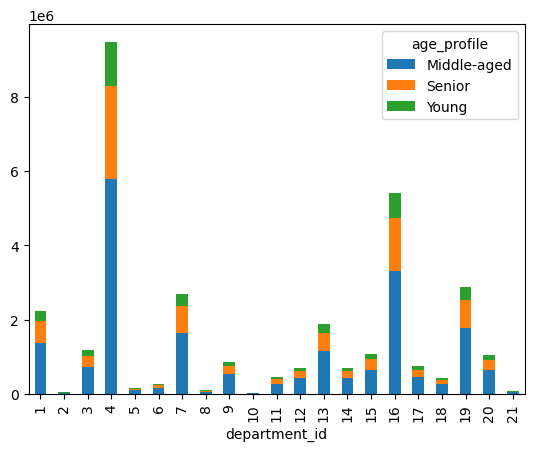

In [90]:
# Creating a stacked bar plot of the new crosstab

age_department_bar = age_department_cros.plot.bar(stacked = True)

In [91]:
# Exporting 

age_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_department_bar.png'))

In [92]:
# Creating a new crosstab so that the departments are on the x-axis

income_department_cros = pd.crosstab(df['department_id'], df['income_profile'])

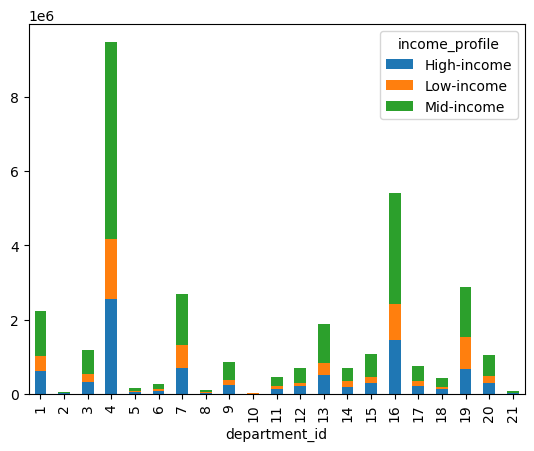

In [93]:
# Creating a stacked bar plot of the new crosstab

income_department_bar = income_department_cros.plot.bar(stacked = True)

In [94]:
# Exporting 

income_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_department_bar.png'))

In [95]:
# Creating a new crosstab so that the departments are on the x-axis

vegan_department_cros = pd.crosstab(df['department_id'], df['vegan_profile'])

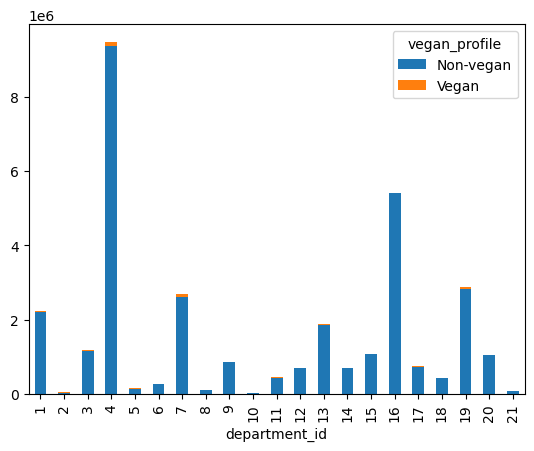

In [96]:
# Creating a stacked bar plot of the new crosstab

vegan_department_bar = vegan_department_cros.plot.bar(stacked = True)

In [97]:
# Exporting

vegan_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'vegan_department_bar.png'))

In [98]:
# Creating a new crosstab so that the departments are on the x-axis

variety_department_cros = pd.crosstab(df['department_id'], df['variety_profile'])

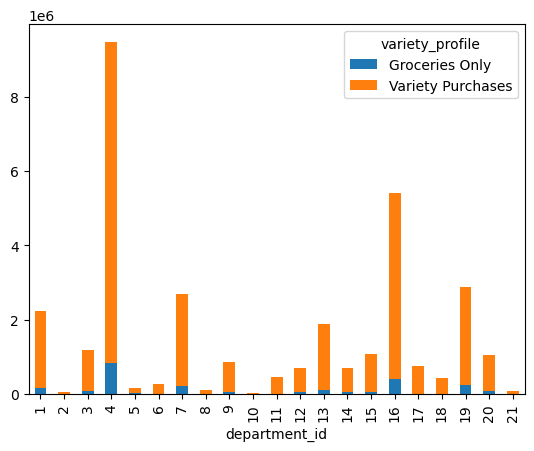

In [99]:
# Creating a stacked bar plot of the new crosstab

variety_department_bar = variety_department_cros.plot.bar(stacked = True)

In [100]:
# Exporting 

variety_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'variety_department_bar.png'))

In [101]:
# Creating a new crosstab so that the departments are on the x-axis

family_department_cros = pd.crosstab(df['department_id'], df['family_profile'])

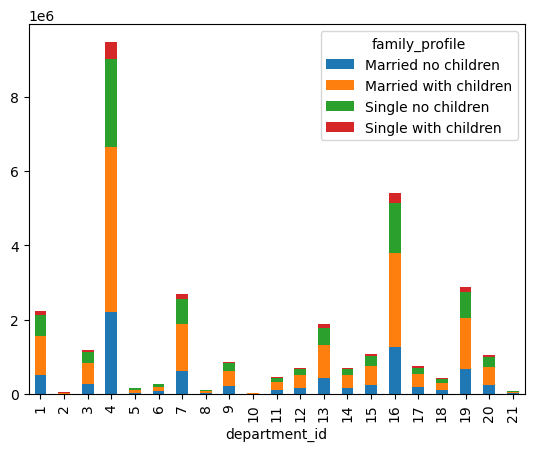

In [102]:
# Creating a stacked bar plot of the new crosstab

family_department_bar = family_department_cros.plot.bar(stacked = True)

### Extra Functions aimed at answering project questions and deliverables

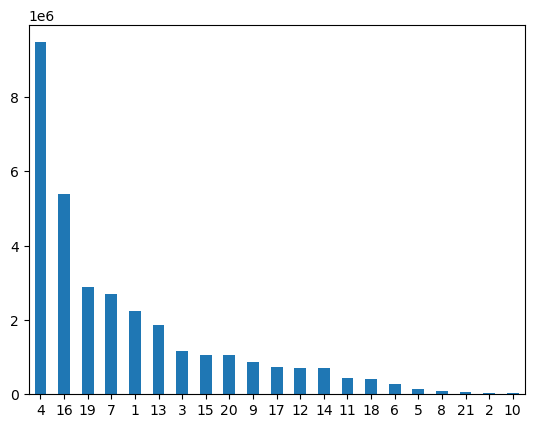

In [10]:
# Frequency of department chart

dept_freq_bar = df['department_id'].value_counts().plot.bar(rot=0)

In [11]:
dept_freq_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dept_freq_bar.png'))

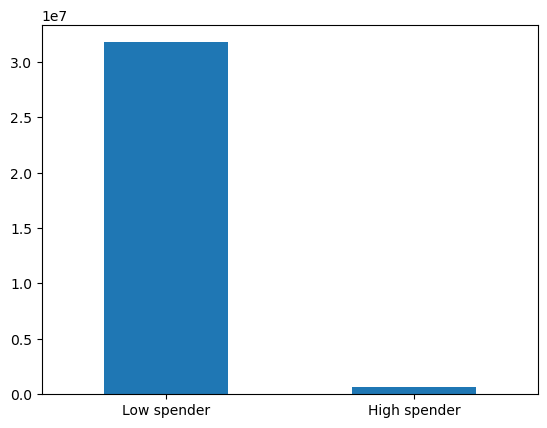

In [12]:
spender_bar = df['spending_flag'].value_counts().plot.bar(rot=0)

In [13]:
spender_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'spender_bar.png'))

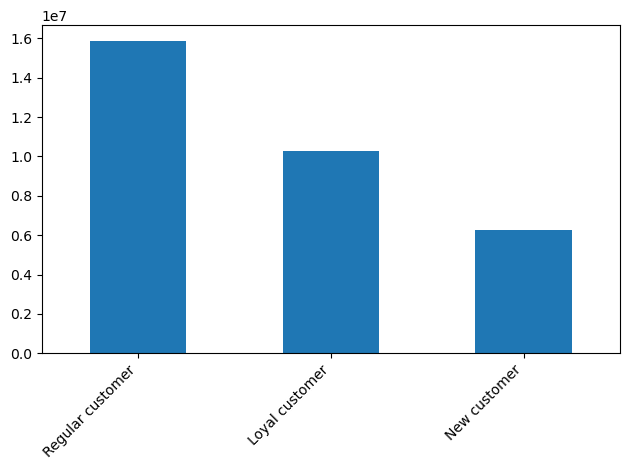

In [15]:
loyalty_flag_bar = df['loyalty_flag'].value_counts().plot.bar(rot=0)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

In [16]:
loyalty_flag_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_bar.png'))

In [103]:
# Exporting 

family_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_department_bar.png'))

In [104]:
#exporting the final dataset

df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_combined.pkl'))